<div align="center" style="color:Blue;font-size:20px">Car data segmentation using Hierarchical clustering-Agglomerative clustering</div>

### Task1

In [ ]:
#importing dataset and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import scipy.cluster.hierarchy as sch #for plotting dendogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv("DS2_C6_S3_CarSales_Data_Practice.csv")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
df.drop(["__year_resale_value","Latest_Launch"],axis=1,inplace=True)

In [5]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [6]:
#missing value treatment
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [7]:
df.shape

(157, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  157 non-null    float64
 5   Engine_size         157 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Wheelbase           157 non-null    float64
 8   Width               157 non-null    float64
 9   Length              157 non-null    float64
 10  Curb_weight         157 non-null    float64
 11  Fuel_capacity       157 non-null    float64
 12  Fuel_efficiency     157 non-null    float64
 13  Power_perf_factor   157 non-null    float64
dtypes: float64(11), object(3)
memory usage: 17.3+ KB


In [9]:
df.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,27.390755,3.060897,185.948718,107.487179,71.15000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,14.259359,1.041299,56.518297,7.616772,3.44079,13.388635,0.626447,3.875440,4.241326,24.980973
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.145000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,23.400000,3.000000,180.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


In [10]:
df1=df.copy()

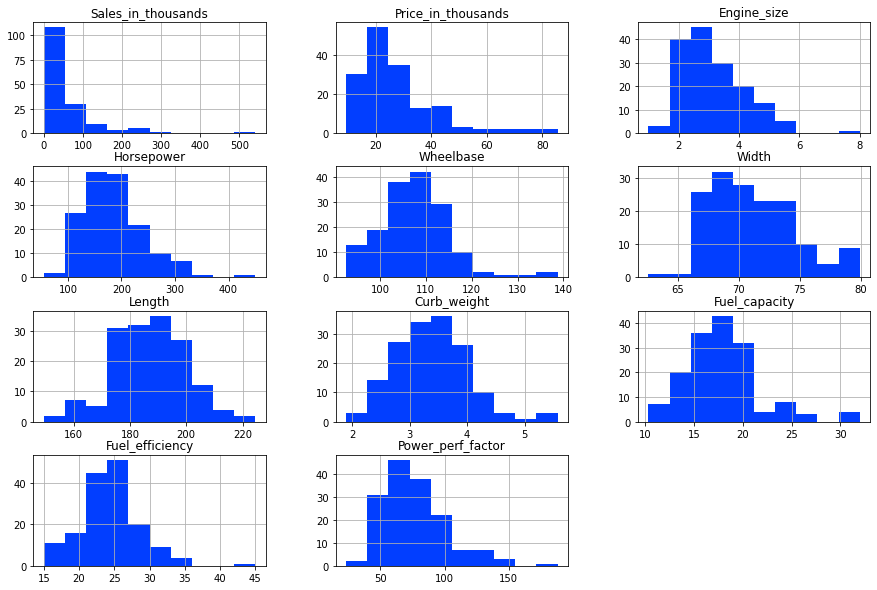

In [43]:
#distribution of numeric columns
df.hist(figsize=(15,10))
plt.show()

In [12]:
#scaling
scaler=StandardScaler()
dfs=pd.DataFrame(scaler.fit_transform(df.select_dtypes(exclude="object")),columns=df.select_dtypes(exclude="object").columns)
dfs1=dfs.copy()

In [13]:
dfs.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.532042,-4.144370e-01,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.183485,-1.230087,0.982981,-0.753513
1,-0.200761,7.100423e-02,0.134013,0.69316,0.080714,-0.247827,0.416338,0.222555,-0.194644,0.273392,0.575359
2,-0.573406,-1.249734e-15,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.147289,-0.194644,0.509921,0.000000
3,-0.654896,1.027816e+00,0.423037,0.42691,0.936825,0.072890,0.693576,0.755825,0.012445,-0.436198,0.576122
4,-0.480754,-2.392560e-01,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.608578,-0.401732,0.746451,-0.572900


### Task2

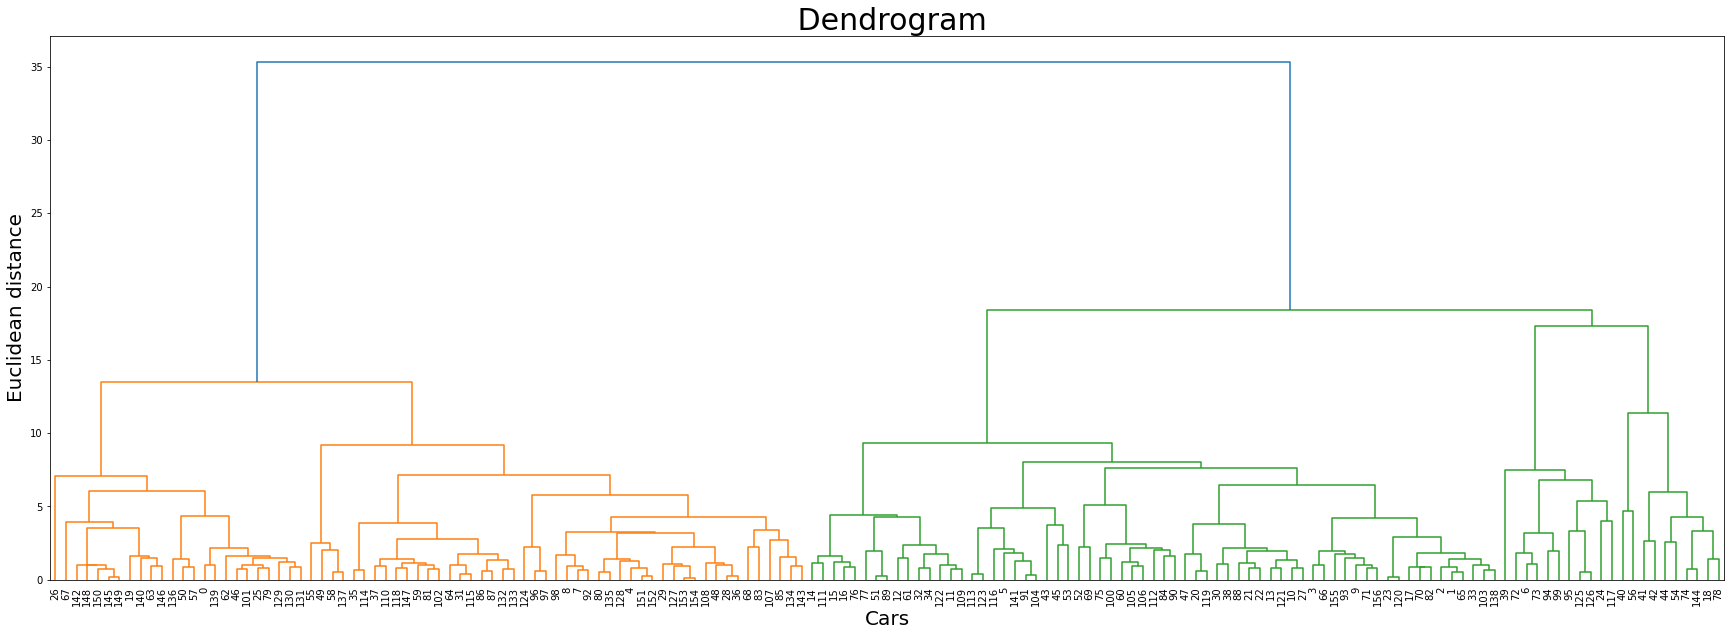

In [14]:
#using dendrogram to find number of clusters
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfs, method = 'ward'))
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

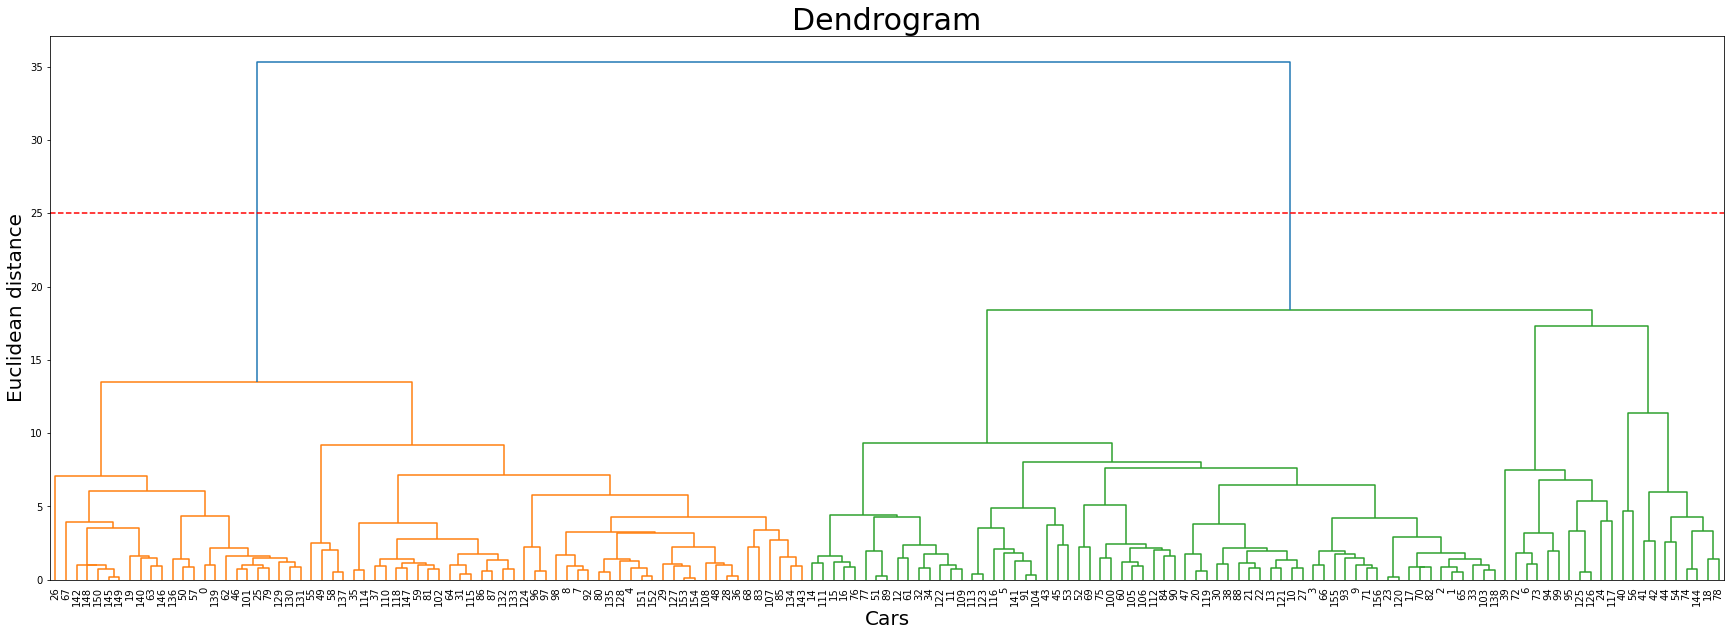

In [15]:
#drawing horizontal line
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfs, method = 'ward'),labels=dfs.index)
plt.axhline(y=25, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()


In [ ]:
#from above dendrogram it can be seen that n_clusters=2

### Task3

In [16]:
#building model using n_clusters=2 and default linkage ward

In [17]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward').fit(dfs)

In [18]:
labels=model.labels_
labels

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [19]:
np.unique(labels,return_counts=True)

(array([0, 1], dtype=int64), array([86, 71], dtype=int64))

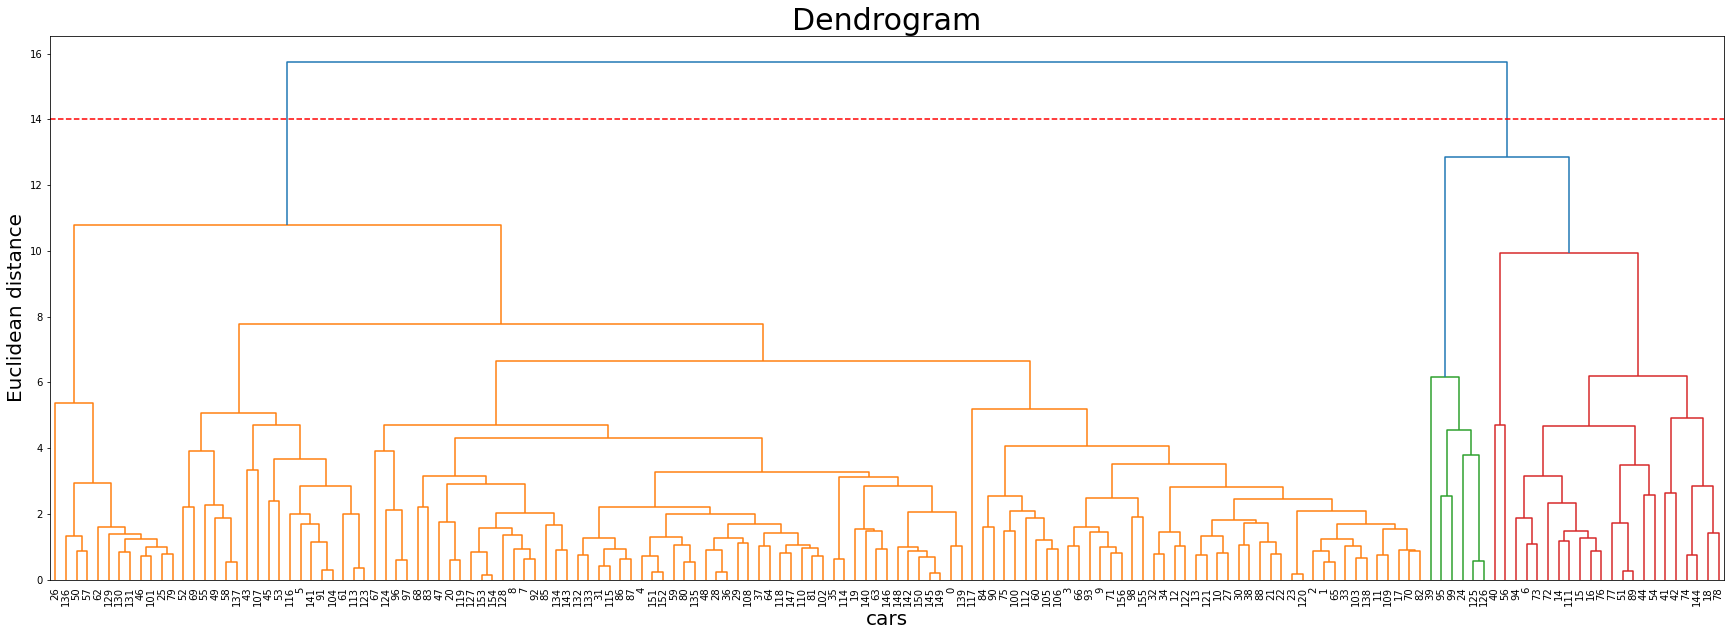

In [20]:
#lets try with linkage as max i.e. complete linkage
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfs, method = 'complete'))
ax = plt.gca()
plt.axhline(y=14, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [21]:
#if we consider complete linkage , n_clusters remains same as 2

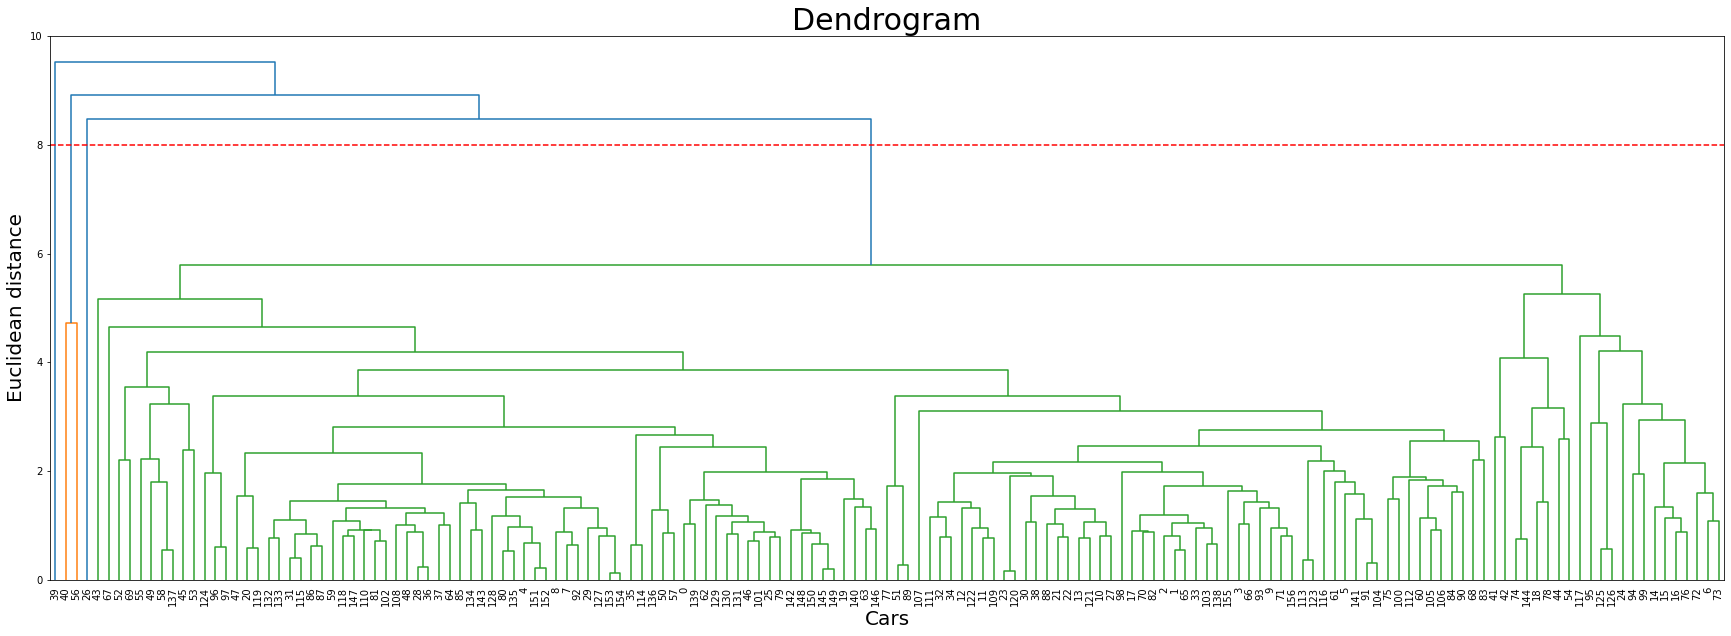

In [22]:
#here linkage is average
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfs, method = 'average'))
ax = plt.gca()
plt.axhline(y=8, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('Cars',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [23]:
#if we consider average linkage, our n_clusters becomes 4 

In [24]:
#building model for different linkages with respective n_clusters

In [25]:
#n_clusters =2 with complete linkage
model2=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete').fit(dfs)

In [26]:
labels2=model2.labels_
labels2

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [27]:
np.unique(labels2,return_counts=True)

(array([0, 1], dtype=int64), array([ 28, 129], dtype=int64))

In [28]:
#n_clusters=4 with average linkage

In [29]:
model3=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average').fit(dfs)

In [30]:
model3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [31]:
#this model with average linkage doesnt seems to be appropriate for given dataset since most of cars are as clustered as label 0

In [32]:
# model with n_clusters=2 and default linkage as ward is clustered equally

### Task4

In [33]:
#Visualization

In [34]:
df1['cluster'] = labels

In [35]:
df1.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,cluster
0,Acura,Integra,16.919,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,Acura,TL,39.384,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,0
2,Acura,CL,14.114,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591,0
3,Acura,RL,8.588,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,0
4,Audi,A4,20.397,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1


<AxesSubplot:xlabel='Horsepower', ylabel='Price_in_thousands'>

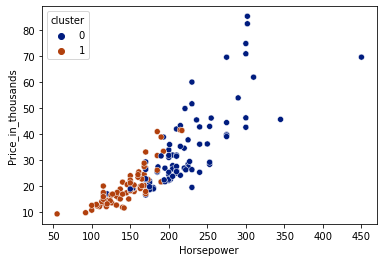

In [36]:
sns.scatterplot(data=df1,x="Horsepower",y="Price_in_thousands",hue="cluster",palette="dark")

In [37]:
#In the above scatter plot we can see how low priced and low HP cars are clustered in 1.based on these features,
#cluster0-high end cars
#cluster1-nomral cars

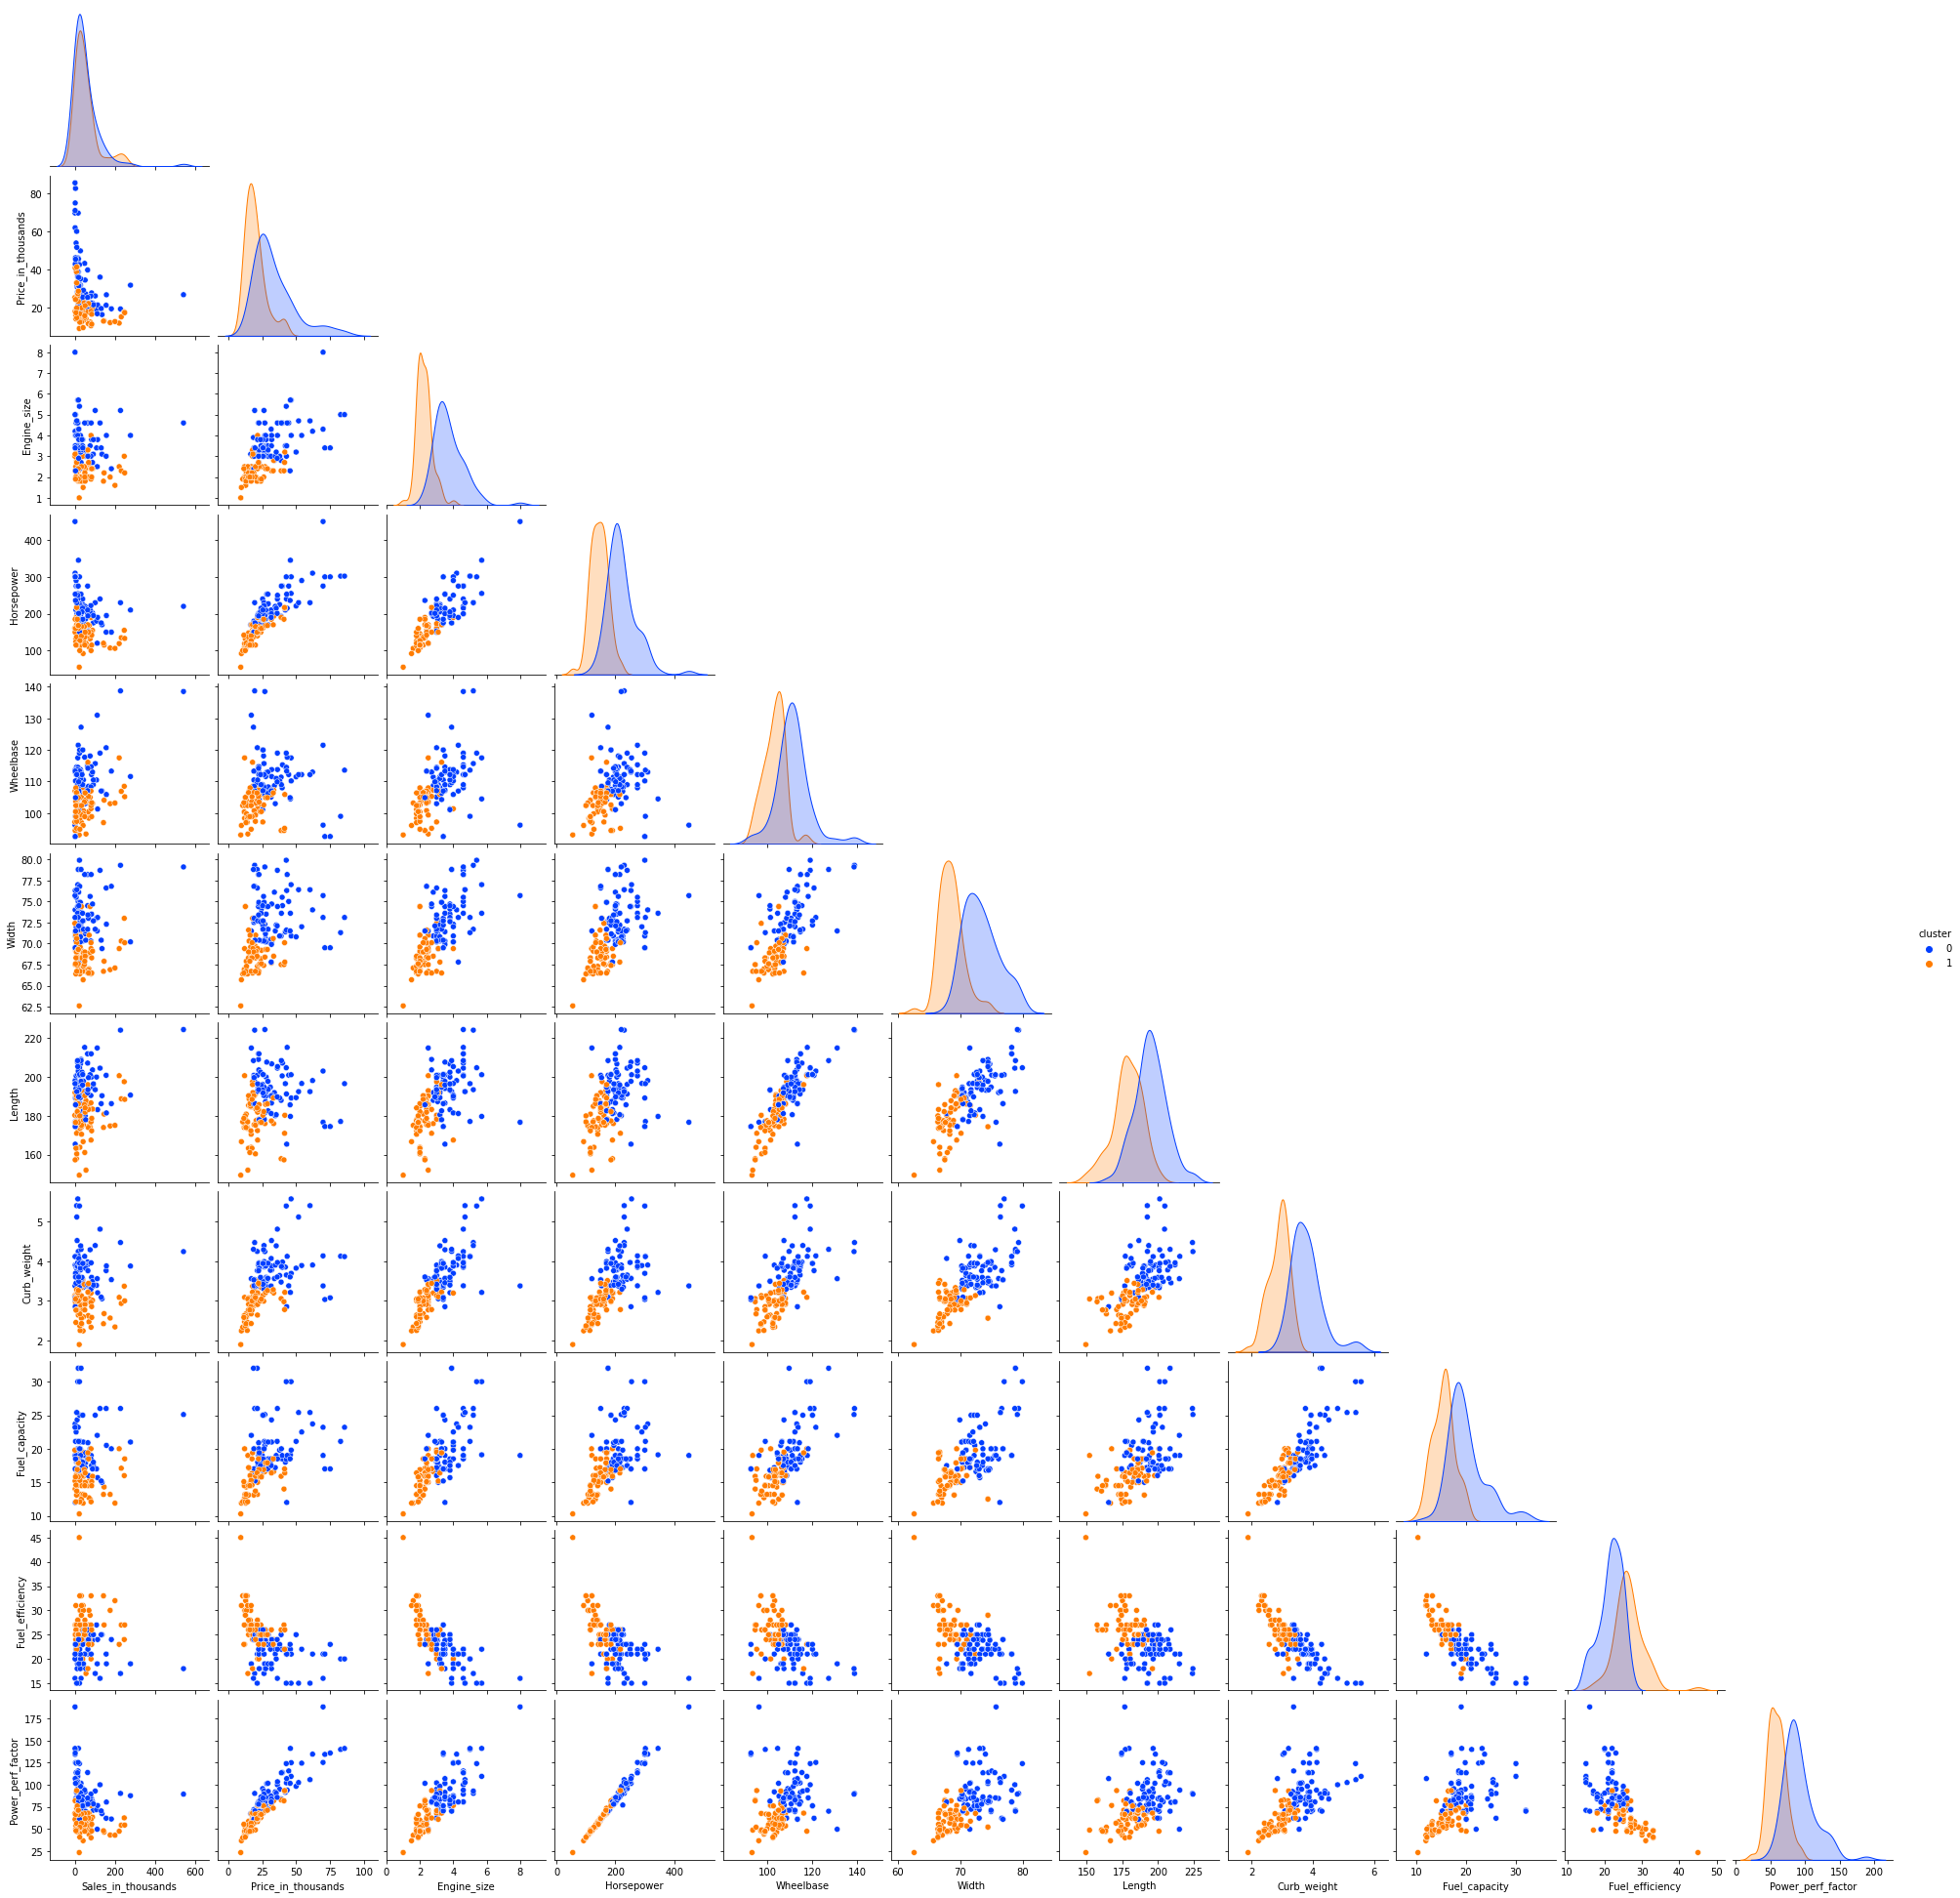

In [38]:
#pair plot for all features to distinguish clusters
sns.set_palette("bright")
sns.pairplot(df1, hue ="cluster", corner=True)
plt.show()

Cluster Number:  1
['Integra' 'A4' '323i' '328i' 'Cavalier' 'Prizm' 'Metro' 'Sebring Coupe'
 'Sebring Conv.' 'Cirrus' 'Neon' 'Avenger' 'Stratus' 'Escort' 'Contour'
 'Taurus' 'Focus' 'Ranger' 'Civic' 'Accord' 'CR-V' 'Accent' 'Elantra'
 'Sonata' 'Wrangler' 'Cherokee' 'Mirage' 'Eclipse' 'Galant' '3000GT'
 'Montero Sport' 'Mystique' 'Cougar' 'C-Class' 'SLK' 'SLK230' 'CLK Coupe'
 'Sentra' 'Altima' 'Frontier' 'Cutlass' 'Alero' 'Breeze' 'Sunfire'
 'Boxter' '5-Sep' '3-Sep' 'SL' 'SC' 'SW' 'LW' 'LS' 'Outback' 'Forester'
 'Corolla' 'Camry' 'Celica' 'Tacoma' 'RAV4' '4Runner' 'Golf' 'Jetta'
 'Passat' 'Cabrio' 'GTI' 'Beetle' 'S40' 'V40' 'S70' 'V70']
------------------------------------------------------------
Cluster Number:  0
['TL' 'CL' 'RL' 'A6' 'A8' '528i' 'Century' 'Regal' 'Park Avenue' 'LeSabre'
 'DeVille' 'Seville' 'Eldorado' 'Catera' 'Escalade' 'Malibu' 'Lumina'
 'Monte Carlo' 'Camaro' 'Corvette' 'Impala' 'Concorde' 'LHS'
 'Town & Country' '300M' 'Intrepid' 'Viper' 'Ram Pickup' 'Ram Wagon'
 

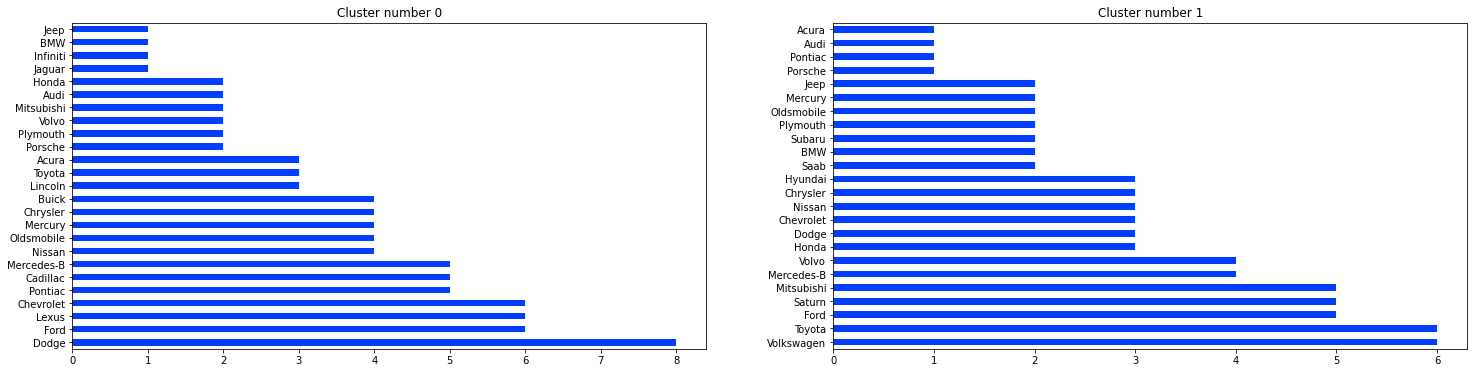

In [39]:
fig, axs = plt.subplots(ncols=len(df1['cluster'].unique()), figsize=(25, 6))
for i in df1['cluster'].unique():
    print('Cluster Number: ', str(i))
    temp_df = df1[['Manufacturer','Model','cluster']][df1['cluster'] == i]
    print(temp_df["Model"].unique())
    temp_df["Manufacturer"].value_counts().plot(kind= 'barh',ax=axs[i])
    axs[i].set_title('Cluster number {}'.format(i))
    print(20* '---')

In [40]:
#names of manufactures in their repective clusters is seen in above chart

In [41]:
df1.pivot_table(index=df1["cluster"],values=df1[["Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]])

,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Power_perf_factor,Price_in_thousands,Wheelbase,Width
cluster,,,,,,,,,,
0,3.784977,3.730941,20.031999,21.692238,220.441264,194.684228,91.814682,33.794820,111.241711,73.354070
1,2.885099,2.249296,15.432394,26.450704,144.169014,178.452113,59.151847,19.633718,102.939437,68.480282


In [42]:
#Here we can clearly see how clusters are formed. all higher data for  features other than fuel efficiency are mapped onto cluster0